 # The objective of this notebook is to Process the raw data prepared by joining the 'neutrophils' and 'Clinical Data'. Further perform exploration of the processed data for imbalanced Labels


In [2]:
import pandas as pd
import numpy as np


In [3]:
neu_data=pd.read_csv('datasets/rawSRDV3_neutrophils.csv')

In [8]:
#Feature Engieering: Dropping columns on no significance
drop_col_list=[
       'Date of sample collection relative to diagnosis',
       'FAB subtype (stages)', 'Unnamed: 8', 'Unnamed: 9', 'Abbreviation',
       'Classification/ category https://seer.cancer.gov/seertools/seerrx/',
       'Subcategory', 'Line of therapy/ FDA approved for AML and / or CML',
        'Single-cell type', 'Cell counts',
       'Post-treatment samples collection information', 'Transplantation',
       ]
neu_data= neu_data.drop(drop_col_list, axis=1)

In [15]:
#Identifying the amount of missing values in each column for EDA
((neu_data.isnull() | neu_data.isna()).sum() * 100 / neu_data.index.size).round(2)

genes                  0.0
p_val                  0.0
avg_logFC              0.0
Sample ID              0.0
outcome                0.0
Age                    0.0
Age group              0.0
Gender                 0.0
FAB subtype            0.0
Mutation               0.0
Therapeutic regimen    0.0
Treatment group        0.0
mutations              0.0
mutations_order        0.0
dtype: float64

In [17]:
neu_data.dtypes

genes                  category
p_val                   float64
avg_logFC               float64
Sample ID              category
outcome                category
Age                       int64
Age group              category
Gender                 category
FAB subtype            category
Mutation               category
Therapeutic regimen    category
Treatment group        category
mutations              category
mutations_order         float64
dtype: object

In [14]:
neu_data.dropna(inplace=True)

In [16]:
for col in neu_data.columns:
    if neu_data[col].dtypes == 'object':
        neu_data[col] = neu_data[col].astype('category')

<AxesSubplot:>

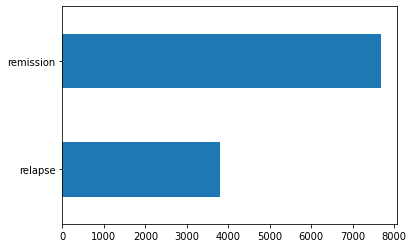

In [18]:
neu_data['outcome'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

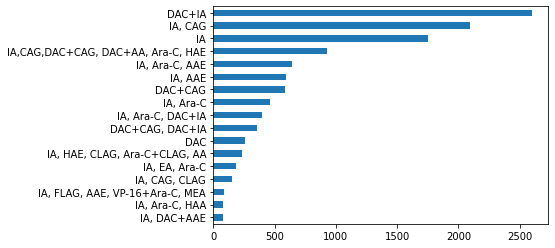

In [19]:
neu_data['Therapeutic regimen'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

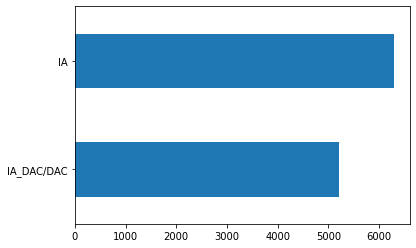

In [20]:
neu_data['Treatment group'].value_counts().sort_values().plot(kind = 'barh')

In [27]:
#Saving the processed data for neutrphils
neu_data.to_csv('datasets/ProcessedSRDV3_neutrophils.csv', index=False)